# Crop & Fertilizer Recommendation System using Machine Learning

## Project Overview
This project develops a machine learning model to recommend optimal crops based on soil composition and environmental conditions, helping farmers maximize yield through data-driven agriculture.

## Dataset Description
Dataset contains 2200 samples (100 samples per crop) with following features:
- N: Nitrogen content in soil (mg/kg) - Range: 0-140
- P: Phosphorous content in soil (mg/kg) - Range: 5-145
- K: Potassium content in soil (mg/kg) - Range: 5-205
- Temperature: Ambient temperature (°C) - Range: 8.8-43.7
- Humidity: Relative humidity (%) - Range: 14.3-100
- pH: Soil pH level - Range: 3.5-9.9
- Rainfall: Annual rainfall (mm) - Range: 20.2-298.6
- Label: Target crop (22 different crops)

## Data Analysis

### Data Quality Assessment
- Perfectly balanced dataset: 100 samples × 22 crops = 2200 total samples
- Complete data: No missing values or duplicates
- Clean data types: Integer (N, P, K), Float (temperature, humidity, pH, rainfall), Object (label)

### Feature Correlations
- Strong correlations:
  * P-K: 0.74 (positive) - Indicates natural soil mineral relationships
- Moderate correlations:
  * Temperature-Humidity: 0.21 (positive)
  * N-P: -0.23 (negative)
- Other correlations are weak (<0.2)

### Crop-wise Analysis

1. Cereals (rice, maize)
   - Rice: High N (60-100), moderate P-K, high rainfall (200-300mm)
   - Maize: Moderate N (60-90), low K (15-25), moderate humidity (60-75%)

2. Pulses (lentils, chickpeas, beans)
   - Low nutrient requirements (N: 20-40, P: 30-60, K: 20-40)
   - Moderate temperature (18-25°C)
   - Low to moderate humidity (20-50%)

3. Fruits (apple, mango, orange, grapes)
   - High P-K requirements (P: 80-140, K: 40-200)
   - Varied temperature needs (20-35°C)
   - High humidity (80-95%)

4. Commercial Crops
   - Cotton/Jute: High N (100-140), moderate P (30-50)
   - Coffee: High N (90-120), lower P-K, specific humidity (50-70%)

### Feature Distribution Patterns
- N: Bimodal (peaks at 20-40 and 80-120)
- P & K: Right-skewed with long tails
- Temperature: Normal distribution (centered ~25°C)
- Humidity: Bimodal (peaks at 20-30% and 80-90%)
- pH: Normal distribution (centered ~6.5)
- Rainfall: Right-skewed (majority 50-150mm)

In [1]:
# pip install numpy pandas matplotlib seaborn

In [2]:
# Importing required libraries
import numpy as np                 # For numerical operations
import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt    # For creating visualizations
import seaborn as sns              # For enhanced visualizations

In [3]:
# Loading dataset from CSV file
crop = pd.read_csv("datasets\Crop_recommendation.csv")

In [4]:
# Displaying first and last few rows of dataset to understand its structure
print("First few rows of the dataset:")
print(crop.head())    # Displays first 5 rows

print("\nLast few rows of the dataset:")
print(crop.tail())    # Displays last 5 rows

First few rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Last few rows of the dataset:
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [5]:
# Getting basic information about dataset
print("Basic information about the dataset:")
print(crop.info())    # Displays data types and non-null counts

print("\nDataset dimensions:")
print(crop.shape)     # Displays number of rows and columns

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Dataset dimensions:
(2200, 8)


In [6]:
# Checking data quality
print("Checking for missing values in each column:")
print(crop.isnull().sum())    # Counts null values per column

print("\nChecking for duplicate rows:")
print(crop.duplicated().sum())    # Counts duplicate entries

Checking for missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Checking for duplicate rows:
0


In [7]:
# Generating summary statistics for numerical features
print("Summary statistics of numerical features:")
print(crop.describe())    # Displays count, mean, std, min, 25%, 50%, 75%, max

Summary statistics of numerical features:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091 

In [8]:
# Displaying column names
print("Column names in dataset:")
print(crop.columns)    # Lists all column names

Column names in dataset:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [9]:
# Analyzing target variable distribution
print("Number of samples for each crop type:")
print(crop['label'].value_counts())    # Counts samples per crop type

Number of samples for each crop type:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


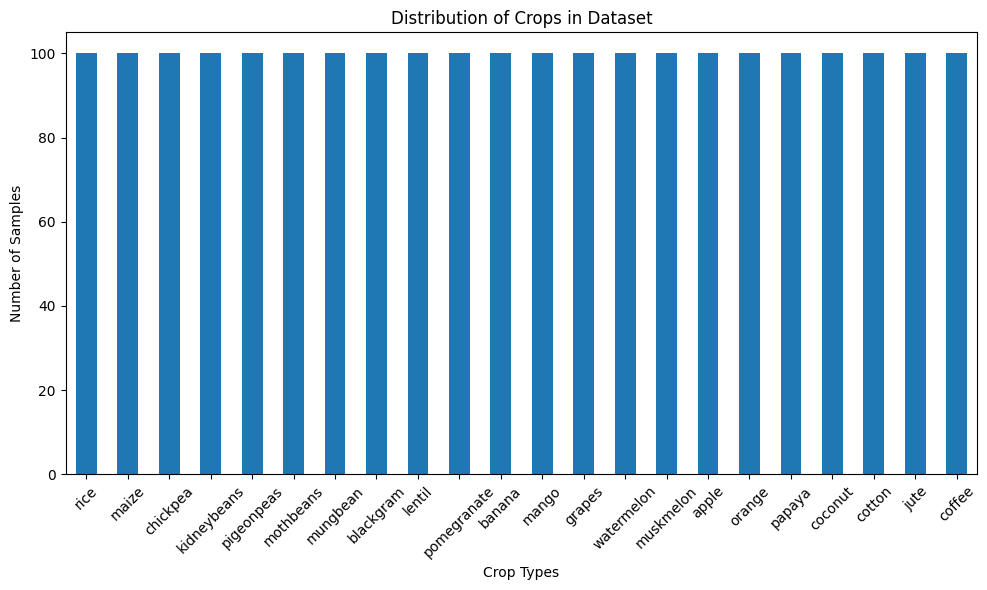

In [10]:
# Creating bar plot of crop distribution
plt.figure(figsize=(10, 6))    # Sets figure size
crop['label'].value_counts().plot(kind='bar')    # Creates bar plot
plt.title('Distribution of Crops in Dataset')
plt.xlabel('Crop Types')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)    # Rotates x-axis labels for better readability
plt.tight_layout()    # Adjusts layout to prevent label cutoff
plt.show()

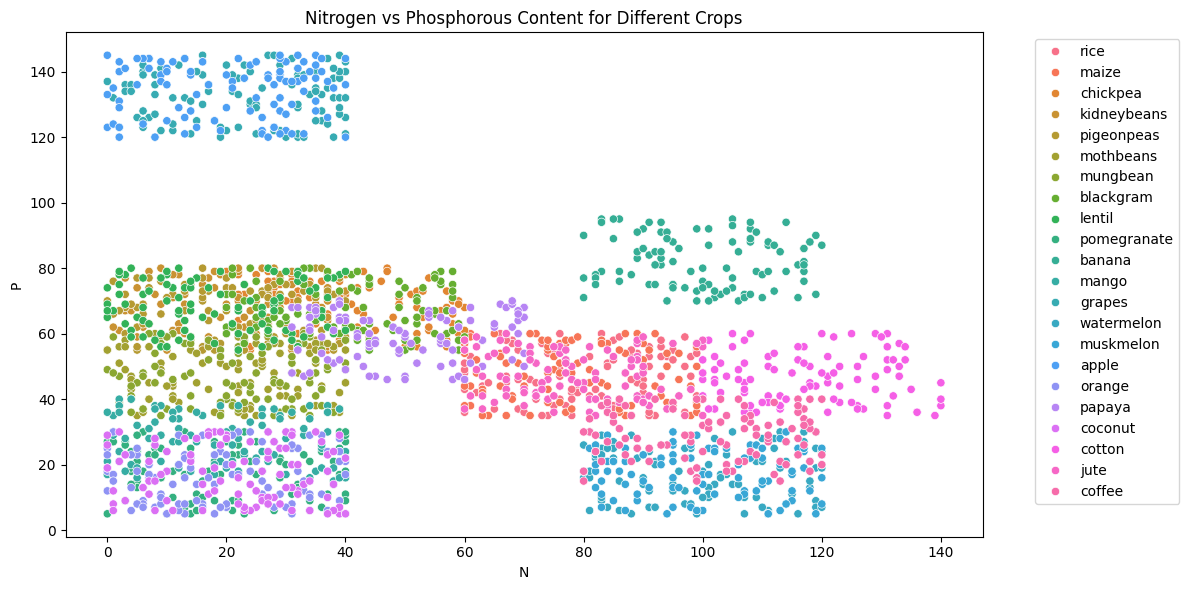

In [11]:
# Creating scatter plot to visualize N vs P relationship for different crops
plt.figure(figsize=(12, 6))    # Sets figure size
sns.scatterplot(data=crop, x='N', y='P', hue='label')    # Creates scatter plot
plt.title('Nitrogen vs Phosphorous Content for Different Crops')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')    # Positions legend outside plot
plt.tight_layout()    # Adjusts layout to prevent cutoff
plt.show()

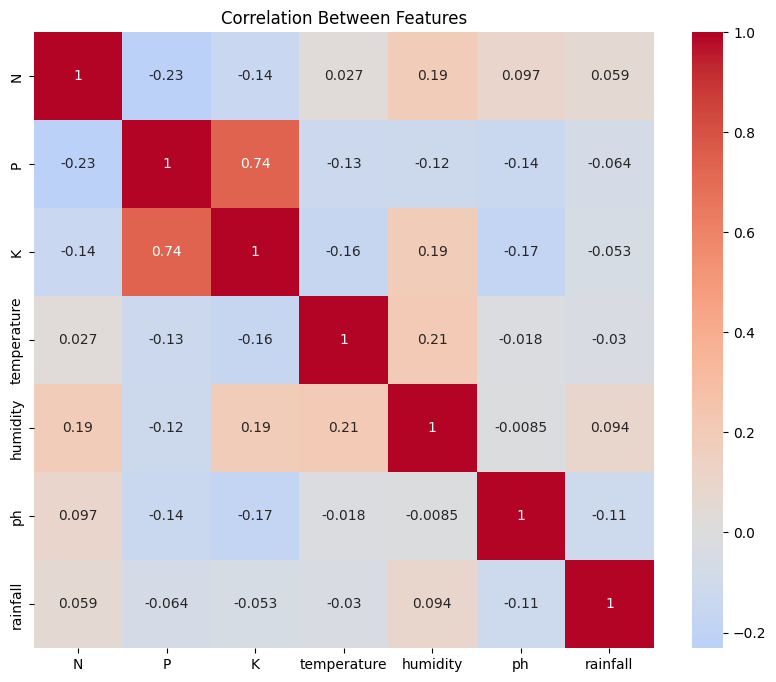

In [12]:
# Creating correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation = crop.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.show()

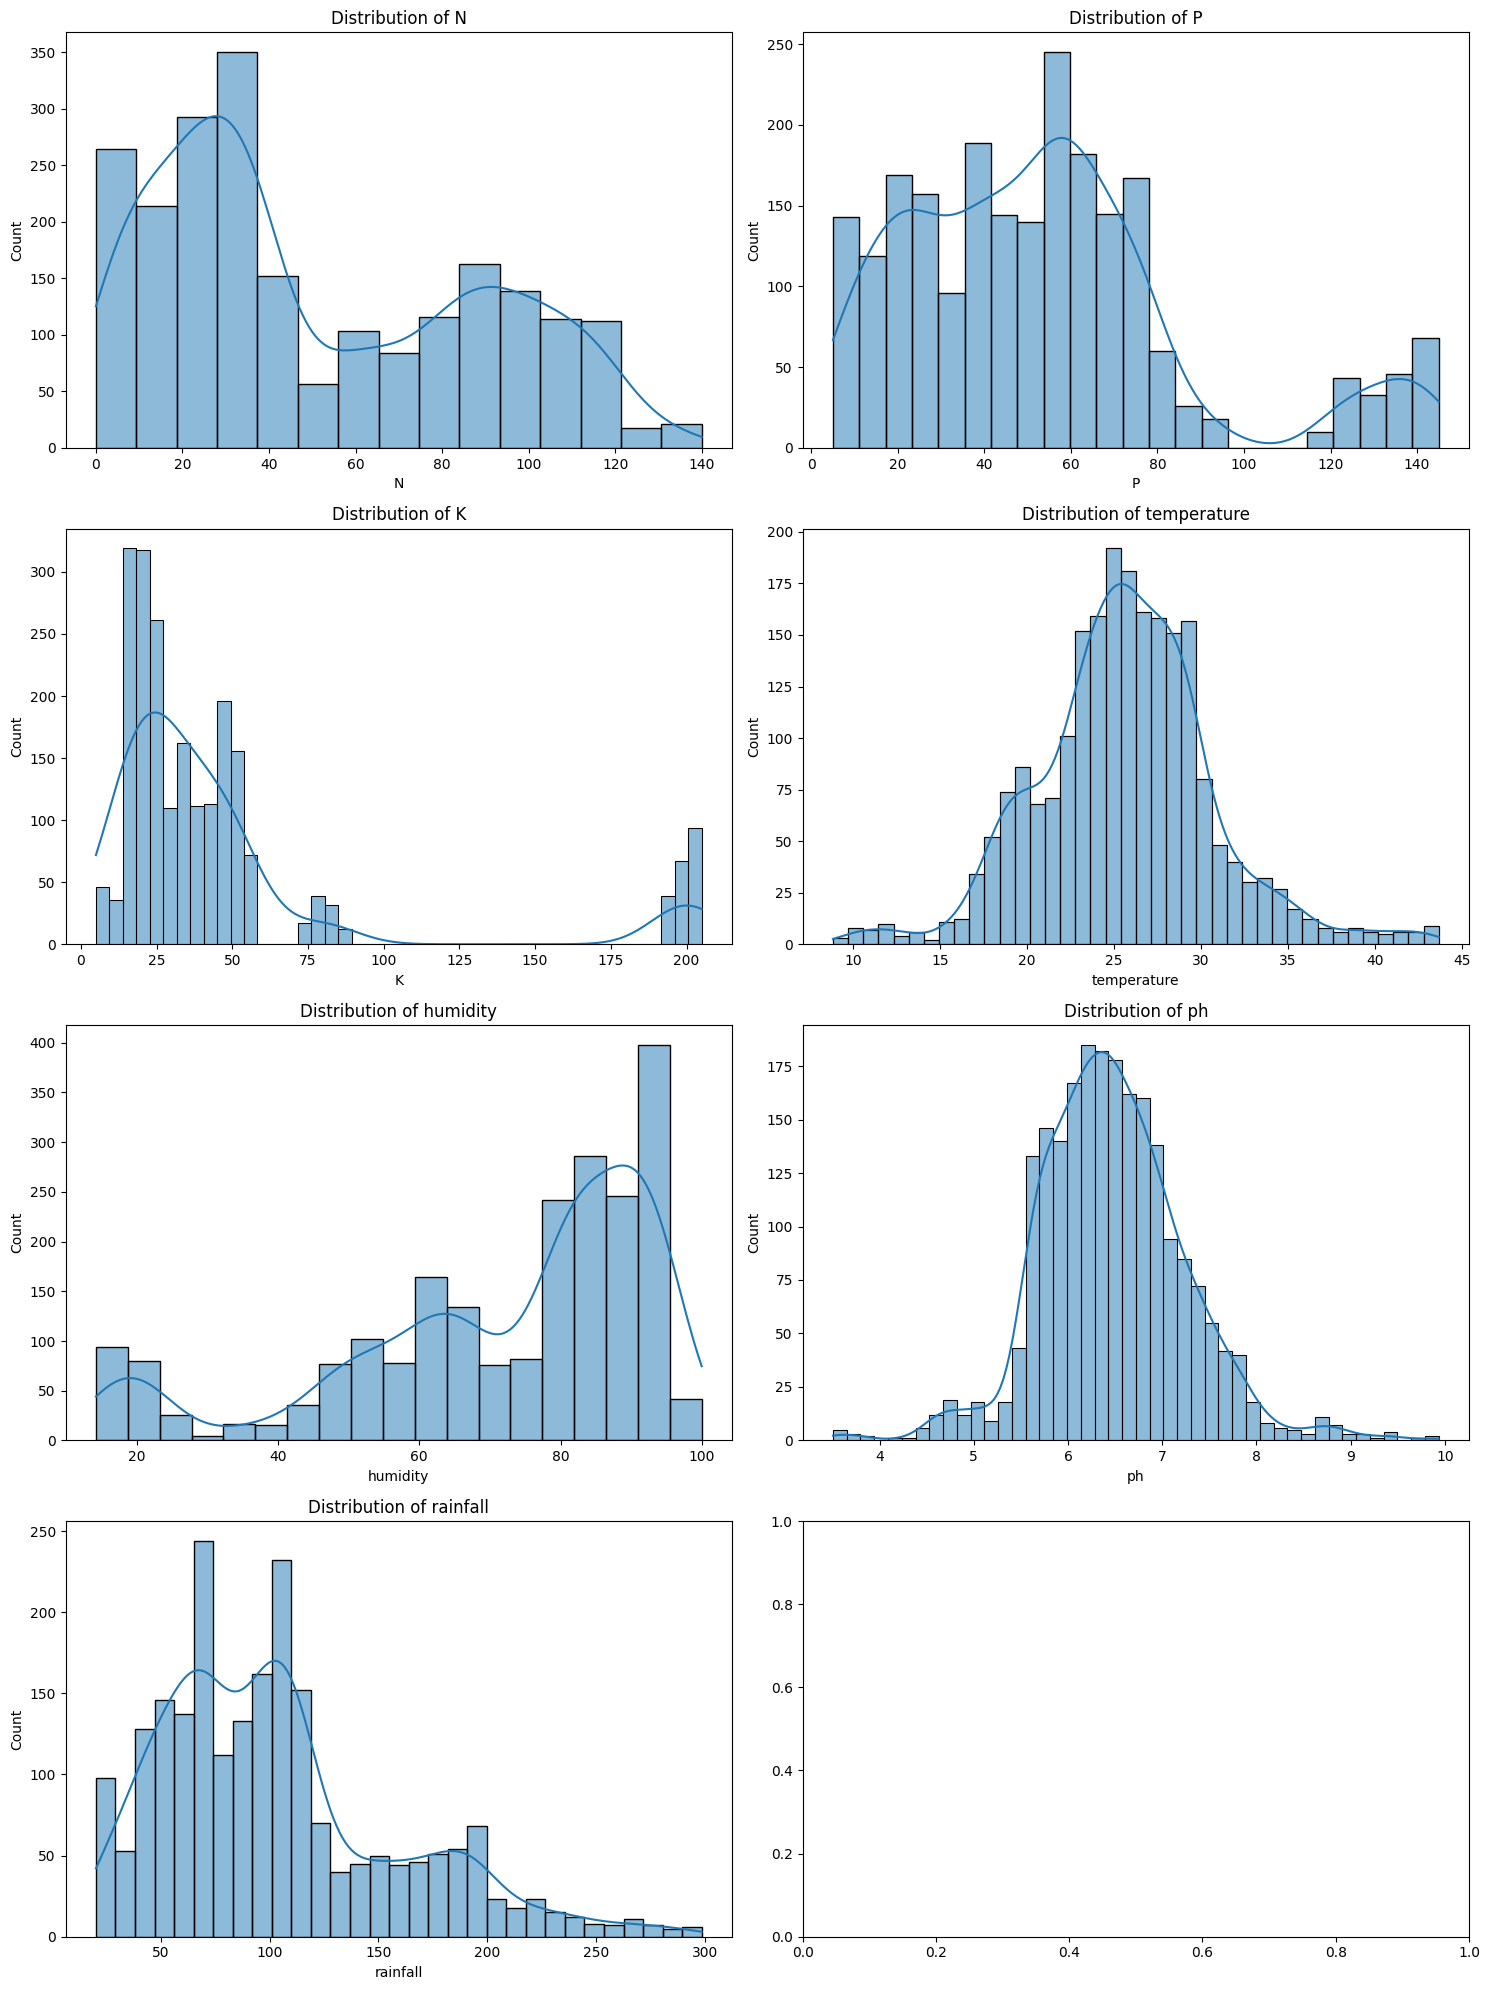

In [13]:
# Creating distribution plots for numerical features
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.histplot(data=crop, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

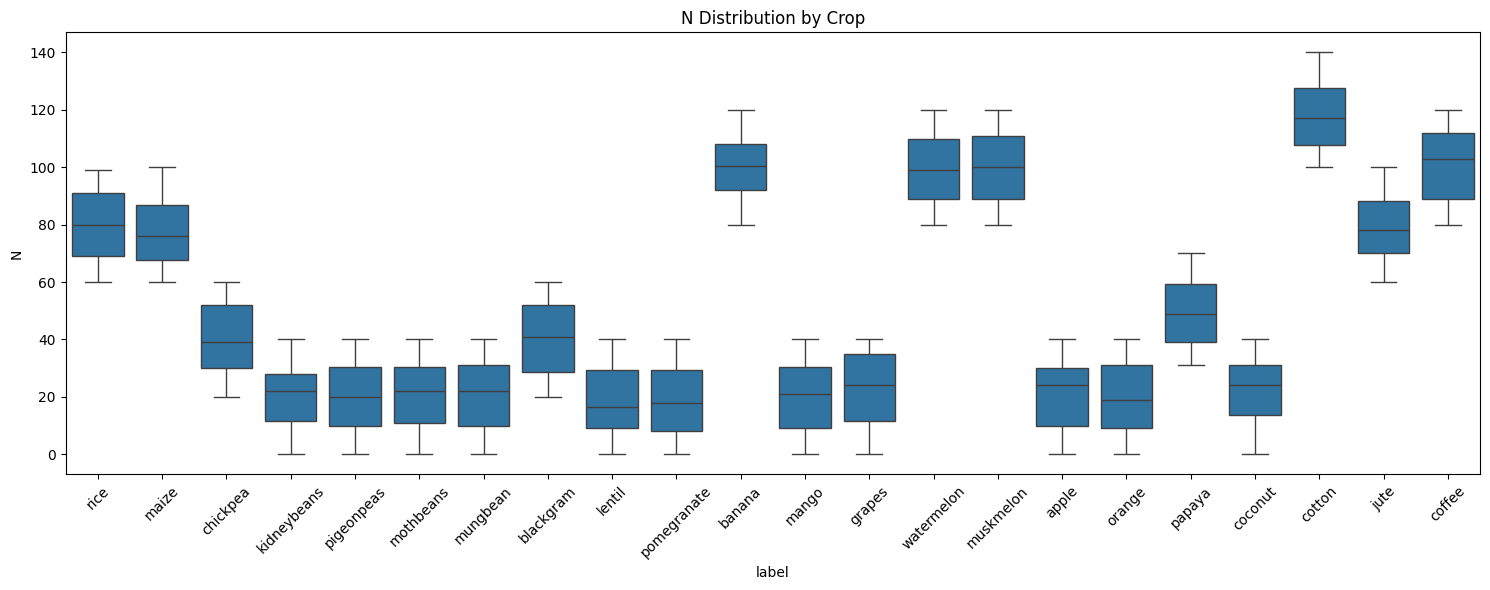

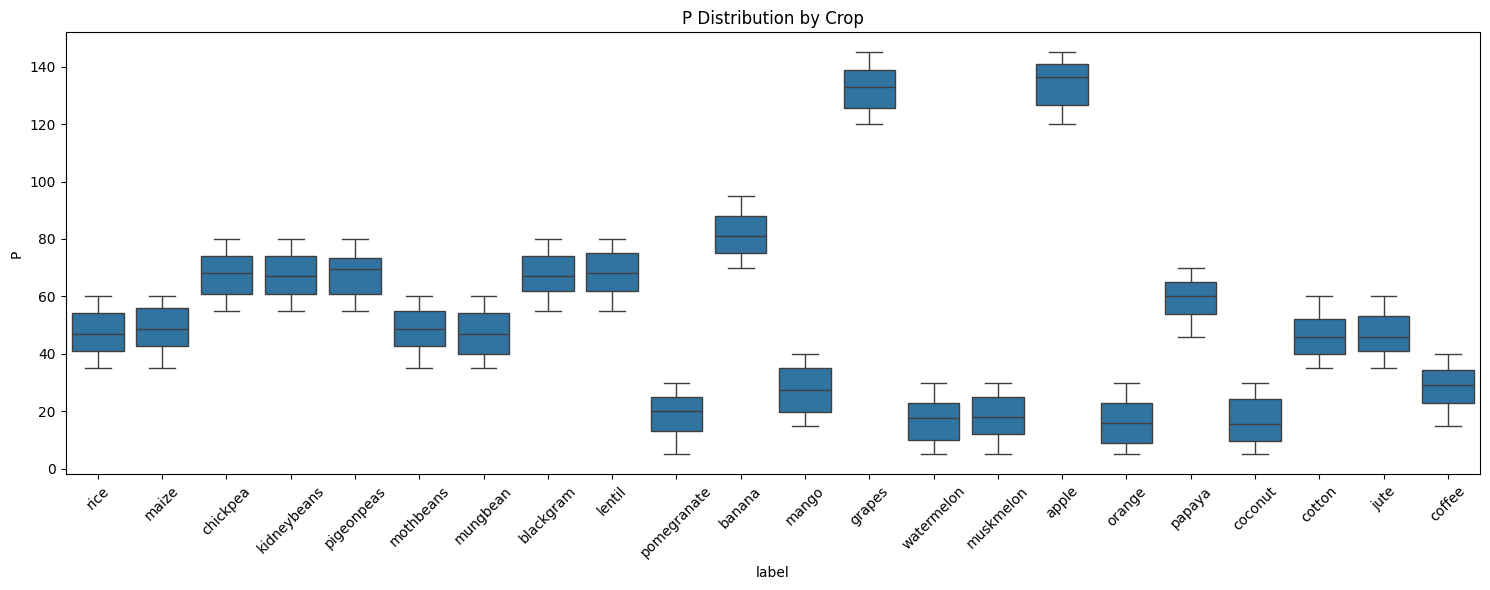

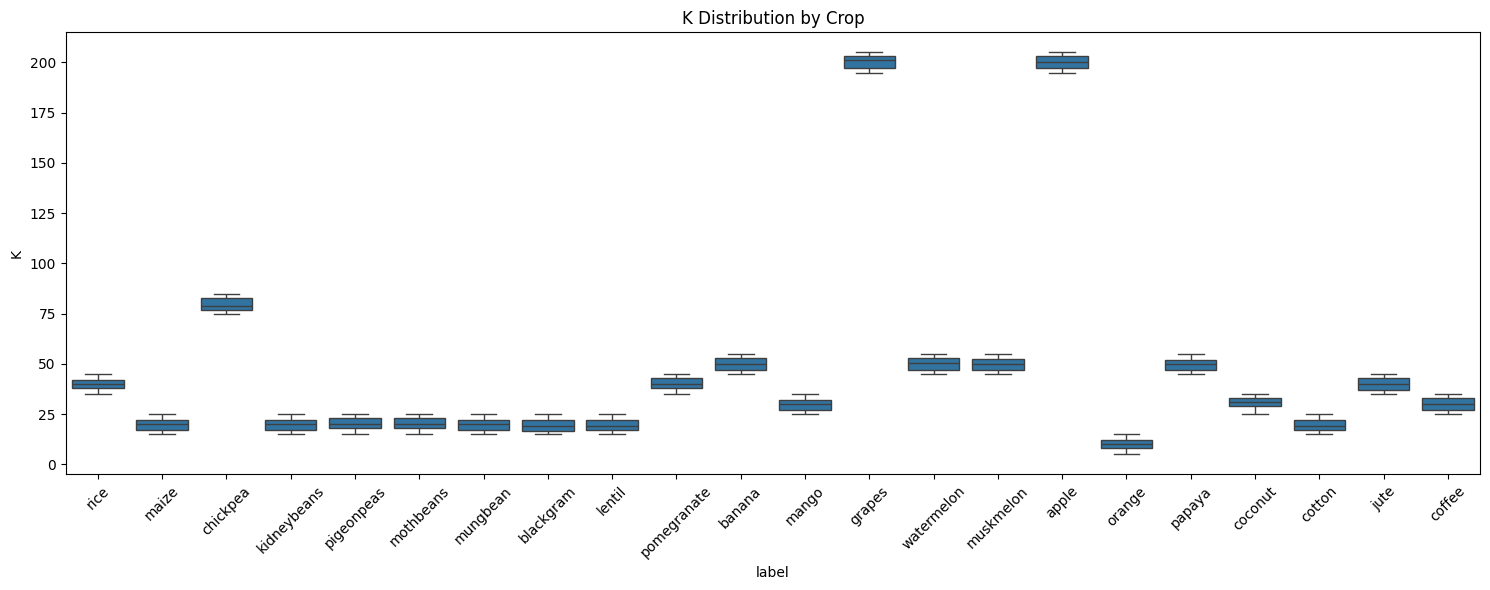

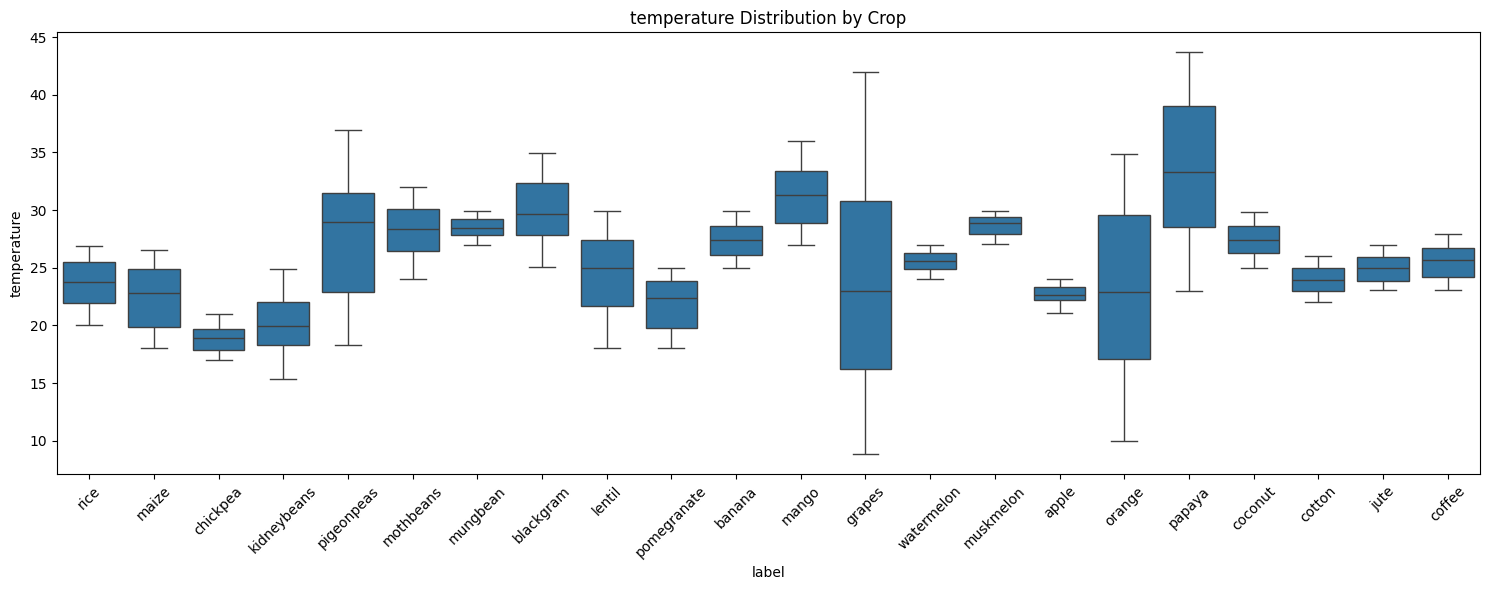

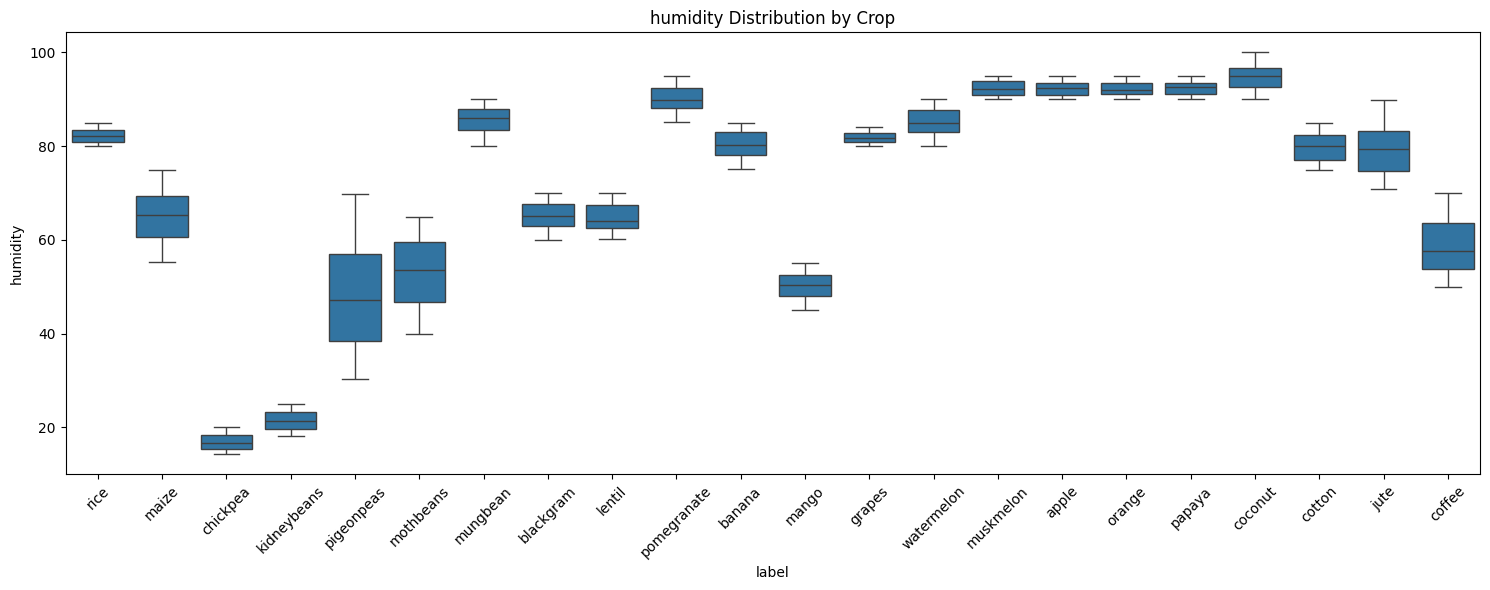

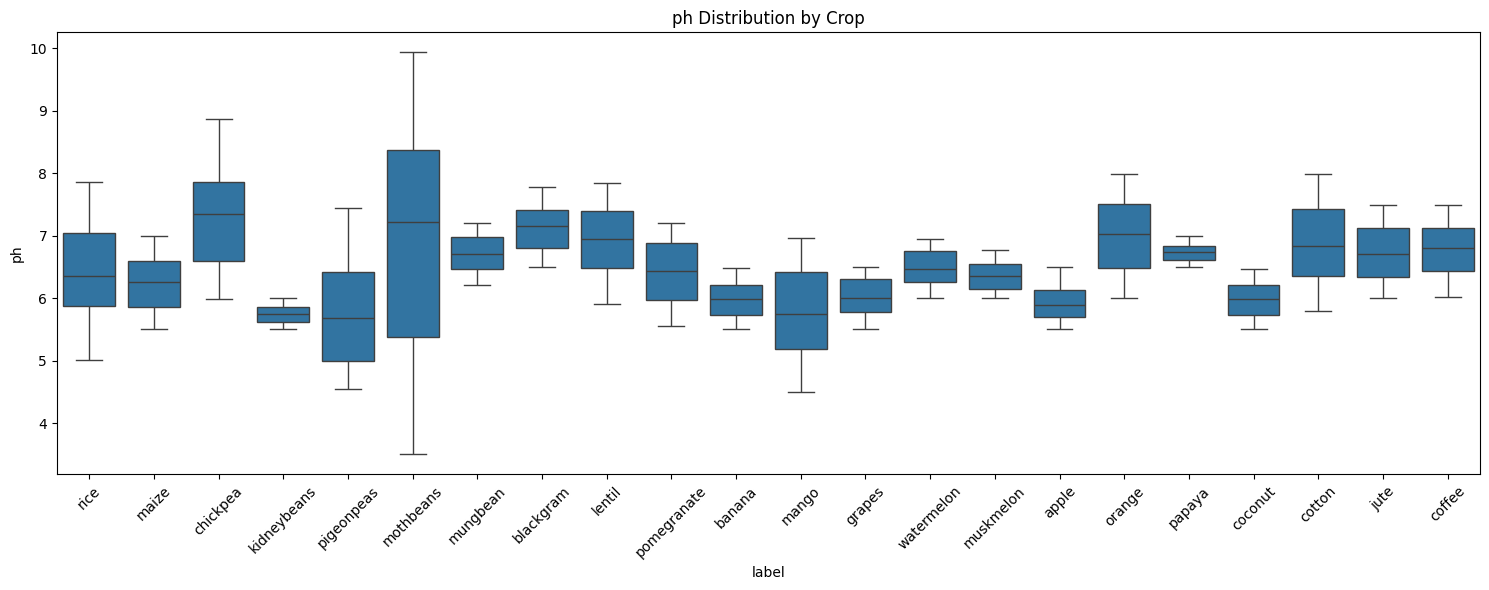

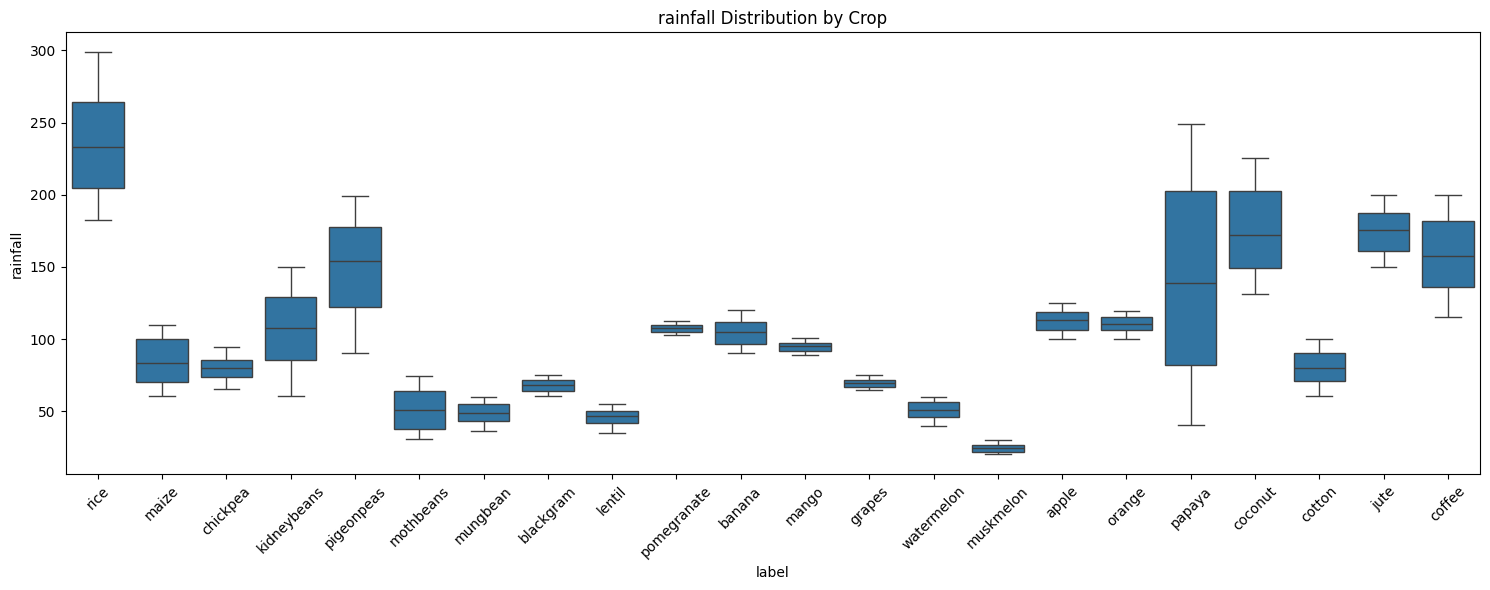

In [14]:
# Creating box plots for each feature by crop type
for feature in numerical_features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='label', y=feature, data=crop)
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution by Crop')
    plt.tight_layout()
    plt.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==2.2.2
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2
